In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['soc.religion.christian',
              'comp.graphics']
# Load Data
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Check number of records in training and testing data
print(len(twenty_train.data))
len(twenty_test.data)

1183


787

In [2]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(twenty_train.data)

# Check Shape of Count Vector
X_train_counts.shape

c:\Users\Jakne\Desktop\Andre\AdditionalAssignment\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1183, 22690)

In [3]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=2).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

c:\Users\Jakne\Desktop\Andre\AdditionalAssignment\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jakne\Desktop\Andre\AdditionalAssignment\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Jakne\Desktop\Andre\AdditionalAssignment\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [4]:
from sklearn import metrics
# Compute DBI score
dbi = metrics.davies_bouldin_score(X_train_counts.toarray(), pred_labels)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X_train_counts.toarray(), pred_labels , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  9.929796680061619 
Silhoutte Score:  0.00834091759967496


In [10]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari_score = adjusted_rand_score(twenty_train['target'], pred_labels)
nmi_score = normalized_mutual_info_score(twenty_train['target'], pred_labels)

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")

Adjusted Rand Index (ARI): 0.6734332309118571
Normalized Mutual Information (NMI): 0.6339416422952047


In [5]:
! pip install wordcloud

     ------------------------------------ 300.2/300.2 kB 807.6 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

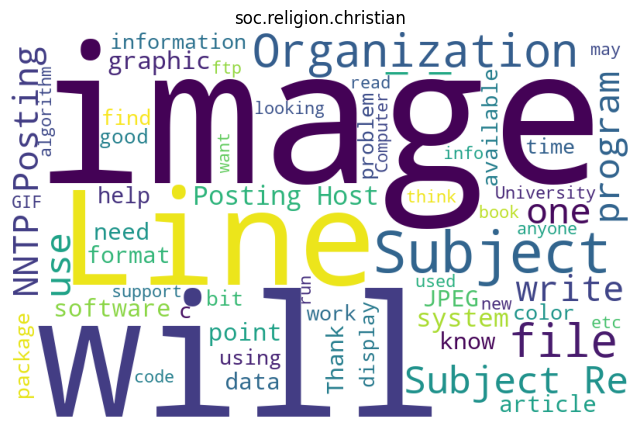

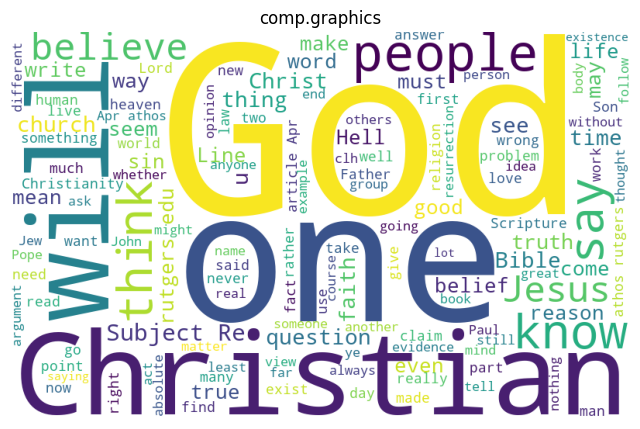

In [8]:
import pandas as pd
df=pd.DataFrame({"text":twenty_train.data,"labels":pred_labels})


for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')